In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [3]:
df=pd.read_excel("D:\Sample - Superstore.xls")
print(df.head())
technology=df.loc[df['Category']=='Technology']
technology['Order Date'].min(),technology['Order Date'].max()
cols=['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols,axis=1,inplace=True)
technology=technology.sort_values('Order Date')
technology.isnull().sum()
technology=technology.groupby('Order Date')['Sales'].sum().reset_index()
technology=technology.set_index('Order Date')
technology.index


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [7]:
k=technology['Sales'].resample('MS').mean()
k['2017':]

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

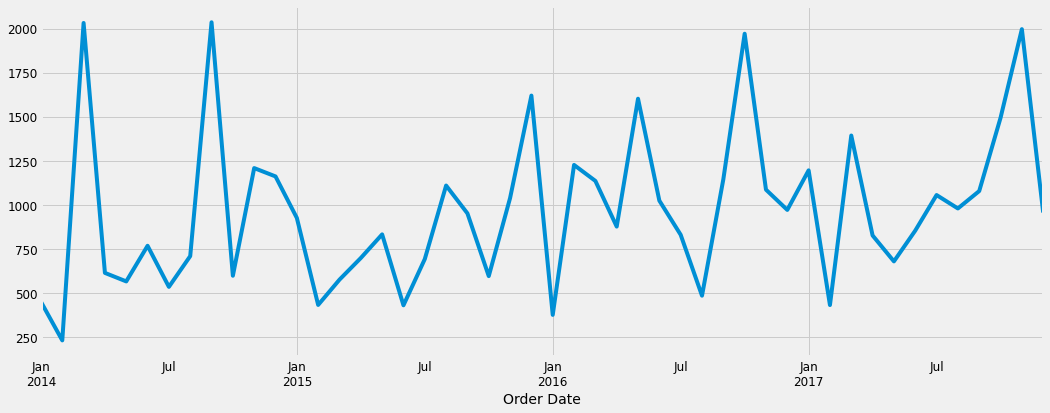

In [8]:
k.plot(figsize=(16,6))
plt.show()

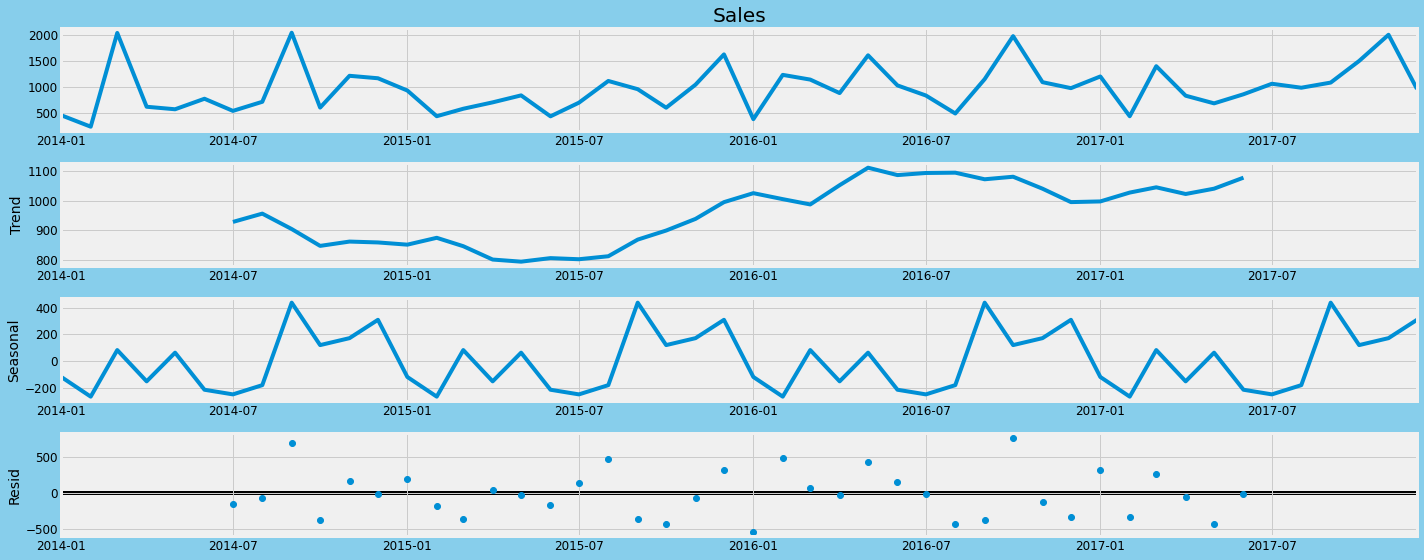

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 8
rcParams['figure.facecolor']='skyblue'
decomposition = sm.tsa.seasonal_decompose(k, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
#Applying ARIMA model to this dataset
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(k,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:807.4541875656608
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2114.308847013408
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:564.2739021568018
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:556.5257093768805
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:765.6142231418087
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:760.0776311987722
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:557.2596257559097
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:558.3805079116074
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:783.7595732836974
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2192.4000978669674
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:565.3560009806428
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:557.3426206567794
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:765.9216897411286
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:760.9447022697386
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:557.4789416900624
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:559.0494728333858
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:744.2627474695936
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2353.541277713247
ARIMA(0, 

In [11]:
mod = sm.tsa.statespace.SARIMAX(k,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1921      0.252     -0.763      0.446      -0.685       0.301
ma.L1         -1.0000   2313.794     -0.000      1.000   -4535.953    4533.953
ar.S.L12      -0.1574      0.258     -0.610      0.542      -0.663       0.348
ma.S.L12      -1.0000   2313.874     -0.000      1.000   -4536.110    4534.110
sigma2      1.511e+05      0.016   9.71e+06      0.000    1.51e+05    1.51e+05


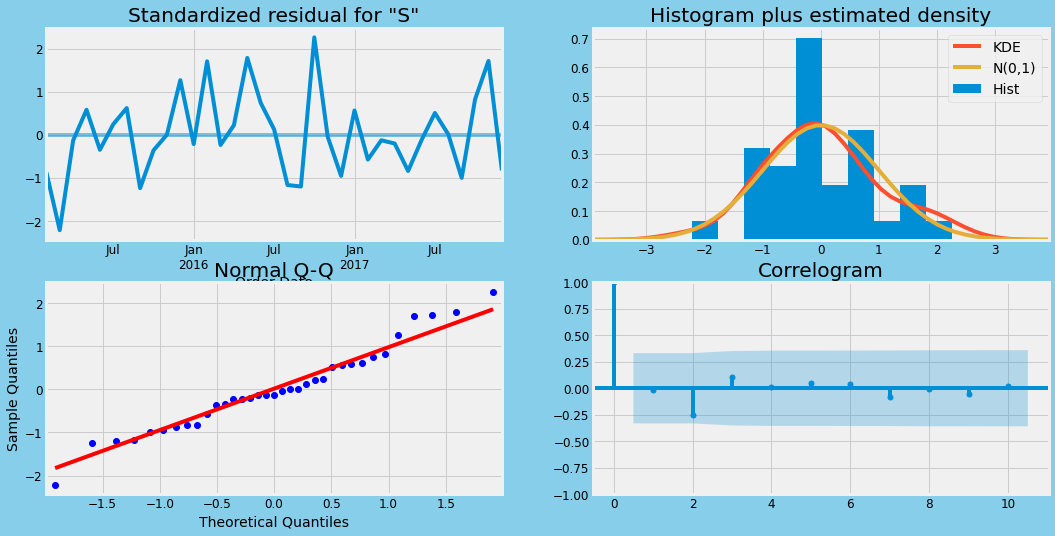

In [12]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

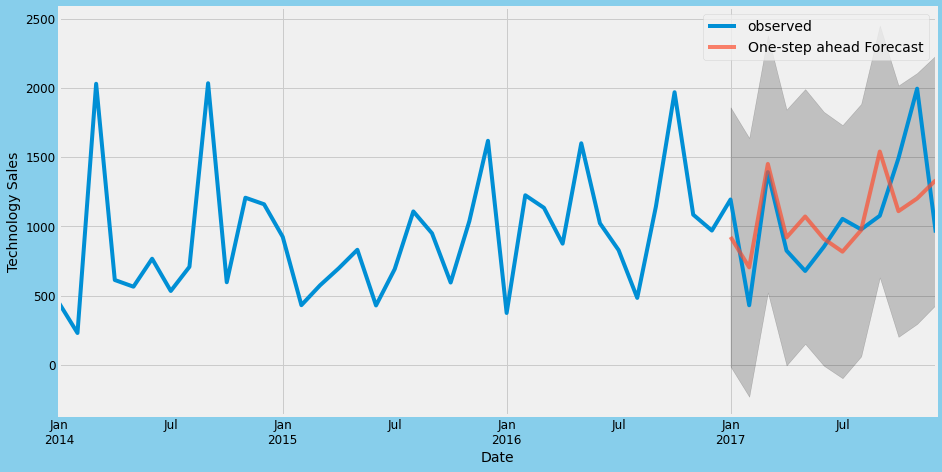

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = k['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

In [14]:
k_forecasted = pred.predicted_mean
k_truth = k['2017-01-01':]
mse = ((k_forecasted - k_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 126006.7


In [15]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 354.97


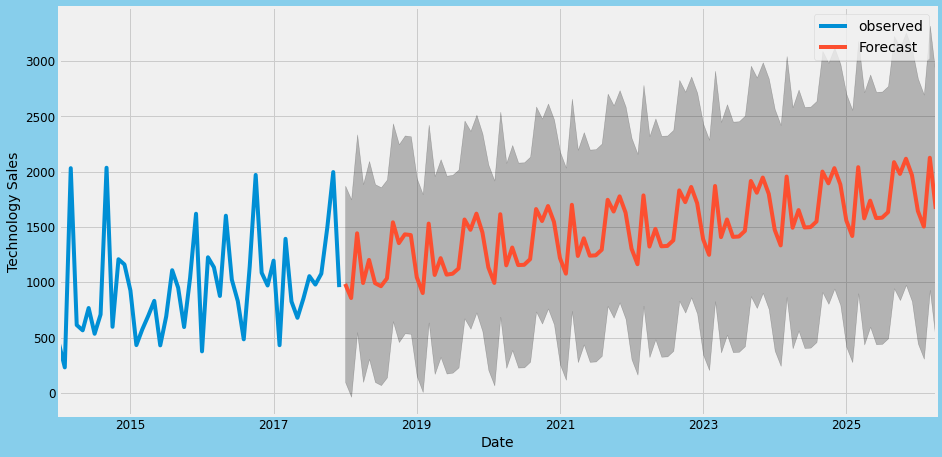

In [16]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = k.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

In [17]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
technology.shape, office.shape

((1847, 21), (6026, 21))

In [18]:
technology = df.loc[df['Category'] == 'Technology']
furniture = df.loc[df['Category'] == 'Furniture']
technology.shape, furniture.shape

((1847, 21), (2121, 21))

In [19]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture=furniture.sort_values('Order Date')
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')
furniture=furniture.set_index('Order Date')
k_technology = technology['Sales'].resample('MS').mean()
k_office = office['Sales'].resample('MS').mean()
k_furniture=furniture['Sales'].resample('MS').mean()
technology = pd.DataFrame({'Order Date':k_technology.index, 'Sales':k_technology.values})
office = pd.DataFrame({'Order Date': k_office.index, 'Sales': k_office.values})
furniture= pd.DataFrame({'Order Date': k_furniture.index, 'Sales': k_furniture.values})
store = technology.merge(office, how='inner', on='Order Date')
store1=technology.merge(furniture, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()



,Order Date,technology_sales,office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545


In [20]:
store1.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'furniture_sales'}, inplace=True)
store1.head()

,Order Date,technology_sales,furniture_sales
0,2014-01-01,449.041429,480.194231
1,2014-02-01,229.787143,367.931600
2,2014-03-01,2031.948375,857.291529
3,2014-04-01,613.028933,567.488357
4,2014-05-01,564.698588,432.049188


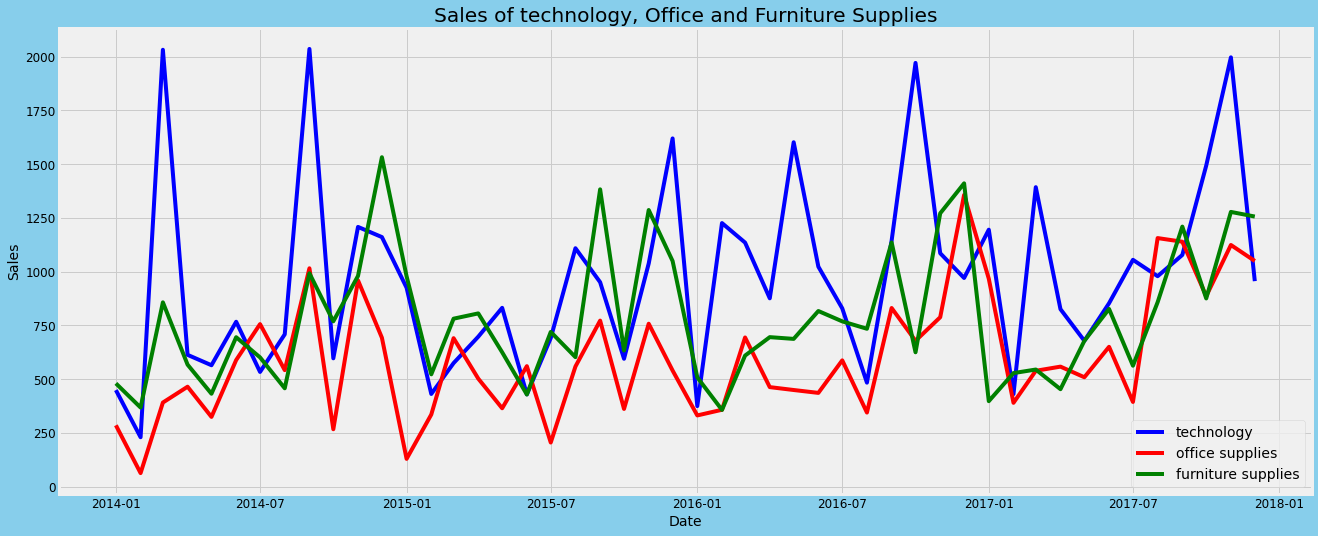

In [24]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['technology_sales'], 'b-', label = 'technology')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.plot(store1['Order Date'], store1['furniture_sales'], 'g-', label = 'furniture supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of technology, Office and Furniture Supplies')
plt.legend();

In [25]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['technology_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than technology is {}.".format(first_date.date()))

Office supplies first time produced higher sales than technology is 2014-07-01.


In [26]:
sec_date = store.loc[np.min(list(np.where(store['office_sales'] > store1['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(sec_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


In [27]:
th_date = store.loc[np.min(list(np.where(store1['furniture_sales'] > store['office_sales'])[0])), 'Order Date']
print("Furniture supplies first produced higher sales than furniture is {}.".format(th_date.date()))

Furniture supplies first produced higher sales than furniture is 2014-01-01.
